In [4]:
#importing libraries
import torch
import numpy as np

#        # 1.LOAD AND VISUALIZE THE DATA

In [5]:
from torchvision import datasets
import torchvision.transforms as transforms
#number of subprocesses touse for data loading
num_workers=0
#hw many samples per batch to load
batch_size=20
#convert the data into a tensor
transform=transforms.ToTensor()

#choosing the training and testing datasets
train_data=datasets.MNIST(root="data",train=True,download=True,transform=transform)
test_data=datasets.MNIST(root="data",train=False,download=True,transform=transform)

#preparing dataloaders
train_loader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,num_workers=num_workers)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=batch_size,num_workers=num_workers)



# VISUALIZE A BATCH OF TRAINING DATA

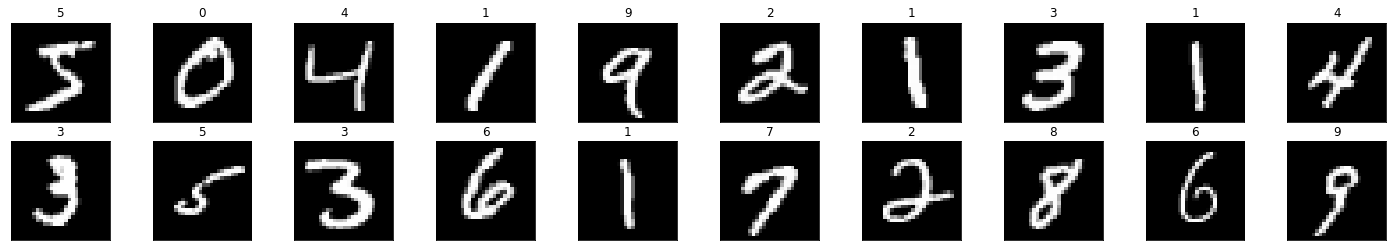

In [6]:
#want to check whether data is loaded correctly and 
#make initial observations and patterns about the data
import matplotlib.pyplot as plt
%matplotlib inline

#obtaining one batch of training imagees
dataiter=iter(train_loader)
images,labels=dataiter.next()
images=images.numpy()

#plotting the images along with their labels
fig=plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax=fig.add_subplot(2,20/2,idx+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(images[idx]),cmap='gray')
    #we want to print the corect label
    #.tem() helps us to obtain the value contained in the tensor
    ax.set_title(str(labels[idx].item()))
    

# viewing an image in more detail

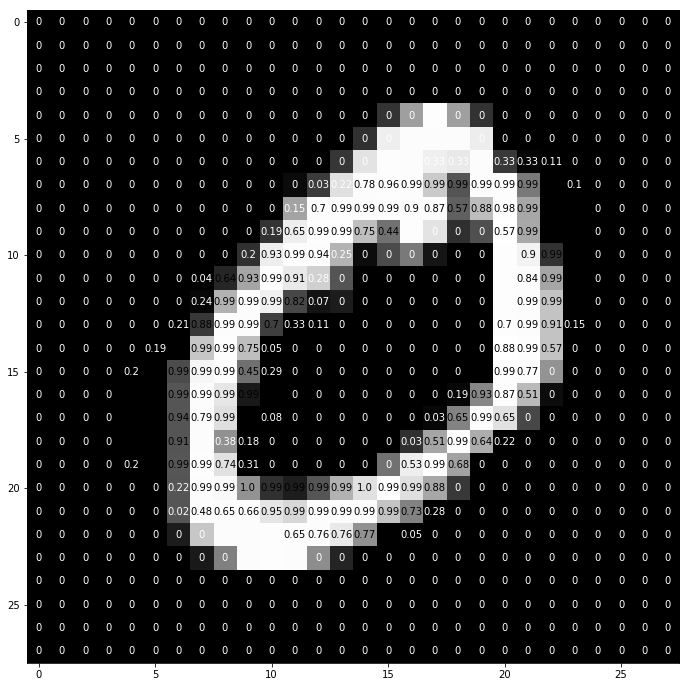

In [7]:
img=np.squeeze(images[1])

fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
ax.imshow(img,cmap='gray')
width,height=img.shape
thresh=img.max()/2.5
for x in range(width):
    for y in range(height):
        val=round(img[x][y],2) if img[x][y]!=0 else 0
        ax.annotate(str(val),xy=(x,y),
                   horizontalalignment='center',
                   verticalalignment='center',
                   color='white' if img[x][y]<thresh else 'black')


# Define the Network Architecture¶

In [8]:
import torch.nn as nn
import torch.nn.functional as F
#defining the nn artchitecture
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #defining number of hidden nodes in each hidden layer
        hidden_1=512
        hidden_2=512
        #linear layer(784 ->hidden_1)
        self.fc1=nn.Linear(28*28,hidden_1)
        self.fc2=nn.Linear(hidden_1,hidden_2)
        self.fc3=nn.Linear(hidden_2,10)
        
        #we want to drop out some values(p=0.2)
        #drop out prevents overfiting
        self.dropout=nn.Dropout(0.2)
        
    def forward(self,x):
        #first,we flatten the image input
        x=x.view(-1,28*28)
        
        #add hidden layer1 together with relu activation function
        x=F.relu(self.fc1(x))
        #add the dropout layer
        x=self.dropout(x)
        
        #add hidden layer 2 together with relu activation function
        x=F.relu(self.fc2(x))
        #add dropout
        x=self.dropout(x)
        
        #add output layer
        x=self.fc3(x)
        
        return x
#initlializing NN
model=Net()
print(model)
        
        
        
        
        

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [9]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# TRAINING THE MODEL


In [10]:
#the following steps are involved in traing the batch
#1.clear the gradient of all optimized variables
#.2.forward pass:compute predicted outputs by passing input to the model
#3.calculate the loss
#4.backward pass:compute the gradient ofthe loss with model parameters
#5.perform a single optimiztion step(parameter update)
#6.update average training loss

In [11]:
#training the model with 50 epochs
n_epochs=50
model.train()#prepeare model for training
for epoch in range(n_epochs):
    #monitoring the trainning loss
    train_loss=0.0
    
    #training the model
    
    for data,target in train_loader:
        #clear the gradient of all optimized variables
        optimizer.zero_grad()
        #forward pass:compute output by passing model parameyers
        output = model(data)
        #calculate the loss
        loss = criterion(output, target)
        #backward pass:compute the gradient of the loss with model parameters
        loss.backward()
        #5.perform a single optimiztion step(parameter update)
        optimizer.step()
        #6.update average training loss
        train_loss+=loss.item()*data.size(0)
        
        
     #printing  the training statistics
        
     #calculating the average loss over an epoch
    train_loss=train_loss/len(train_loader.dataset)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format( epoch+1,train_loss  ))
       
        
        
        
        

Epoch: 1 	Training Loss: 0.840003
Epoch: 2 	Training Loss: 0.326286
Epoch: 3 	Training Loss: 0.254503
Epoch: 4 	Training Loss: 0.205039
Epoch: 5 	Training Loss: 0.172854
Epoch: 6 	Training Loss: 0.148686
Epoch: 7 	Training Loss: 0.131524
Epoch: 8 	Training Loss: 0.116316
Epoch: 9 	Training Loss: 0.104102
Epoch: 10 	Training Loss: 0.094891
Epoch: 11 	Training Loss: 0.086869
Epoch: 12 	Training Loss: 0.079541
Epoch: 13 	Training Loss: 0.073865
Epoch: 14 	Training Loss: 0.068579
Epoch: 15 	Training Loss: 0.062497
Epoch: 16 	Training Loss: 0.058649
Epoch: 17 	Training Loss: 0.055189
Epoch: 18 	Training Loss: 0.051878
Epoch: 19 	Training Loss: 0.049169
Epoch: 20 	Training Loss: 0.046029
Epoch: 21 	Training Loss: 0.043198
Epoch: 22 	Training Loss: 0.041364
Epoch: 23 	Training Loss: 0.038401
Epoch: 24 	Training Loss: 0.036190
Epoch: 25 	Training Loss: 0.034917
Epoch: 26 	Training Loss: 0.032048
Epoch: 27 	Training Loss: 0.031445
Epoch: 28 	Training Loss: 0.030702
Epoch: 29 	Training Loss: 0.0

# TEST OUR TRAINED NETWORK

In [13]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation
#will set all the layers in your model to evaluation mode. 
#This affects layers like dropout layers that turn "off" nodes during training with some probability,
# but should allow every node to be "on" for evaluation!
for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.057466

Test Accuracy of     0: 99% (971/980)
Test Accuracy of     1: 99% (1127/1135)
Test Accuracy of     2: 98% (1015/1032)
Test Accuracy of     3: 98% (990/1010)
Test Accuracy of     4: 98% (966/982)
Test Accuracy of     5: 98% (878/892)
Test Accuracy of     6: 98% (941/958)
Test Accuracy of     7: 97% (1005/1028)
Test Accuracy of     8: 97% (951/974)
Test Accuracy of     9: 97% (987/1009)

Test Accuracy (Overall): 98% (9831/10000)


# VISUALIZE SAMPLE RESULTS

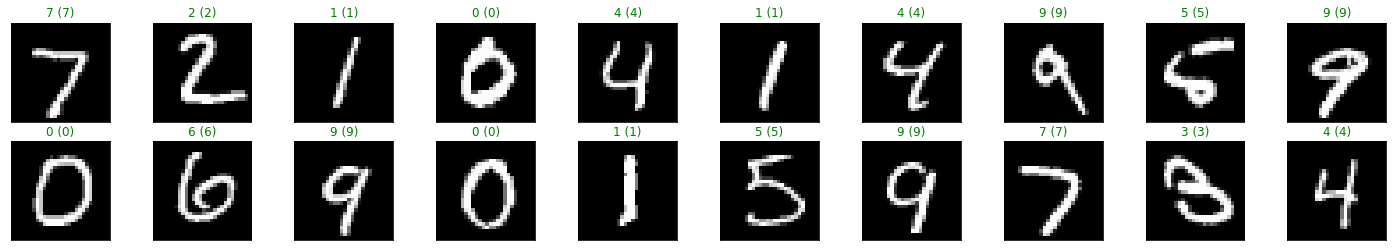

In [14]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))